In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
wipro = pd.read_csv('wipro.csv')
tcs = pd.read_csv('tcs.csv')
hcl = pd.read_csv('hcltech.csv')
infosys = pd.read_csv('infosys.csv')

In [57]:
wipro['Date'] = pd.to_datetime(wipro['Date'], infer_datetime_format=True)
wipro['Date'] = pd.to_datetime(wipro['Date']).dt.date

tcs['Date'] = pd.to_datetime(tcs['Date'], infer_datetime_format=True)
tcs['Date'] = pd.to_datetime(tcs['Date']).dt.date

hcl['Date'] = pd.to_datetime(hcl['Date'], infer_datetime_format=True)
hcl['Date'] = pd.to_datetime(hcl['Date']).dt.date

infosys['Date'] = pd.to_datetime(infosys['Date'], infer_datetime_format=True)
infosys['Date'] = pd.to_datetime(infosys['Date']).dt.date

In [58]:
wipro = wipro.set_index('Date')
tcs = tcs.set_index('Date')
hcl = hcl.set_index('Date')
infosys = infosys.set_index('Date')

In [59]:
wipro.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,103.95,104.51,102.44,103.88,645681
2006-01-03,103.73,107.10,103.14,106.43,1150446
2006-01-04,106.99,109.13,106.99,108.25,1151665
2006-01-05,108.45,108.90,106.26,106.66,839636
2006-01-06,106.88,106.88,101.48,106.36,994361


In [60]:
tcs.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,213.50,213.86,210.17,210.95,206688
2006-01-03,210.66,217.49,210.25,216.65,424617
2006-01-04,217.50,218.74,215.28,217.89,443202
2006-01-05,218.13,218.25,215.24,216.55,178978
2006-01-06,216.88,217.49,211.50,213.20,370718


In [61]:
hcl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,67.50,68.10,66.75,67.36,291639
2006-01-03,68.00,69.00,67.36,68.71,412209
2006-01-04,71.25,71.63,68.52,69.04,646847
2006-01-05,69.76,71.25,68.79,70.35,503329
2006-01-06,71.00,74.06,69.50,73.30,1177316


In [62]:
infosys.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,187.94,187.94,185.81,186.21,415500
2006-01-03,186.88,188.44,186.19,187.93,497496
2006-01-04,188.19,191.56,187.20,190.96,784558
2006-01-05,191.50,191.87,190.08,190.93,472285
2006-01-06,190.63,191.88,188.64,190.83,1062988


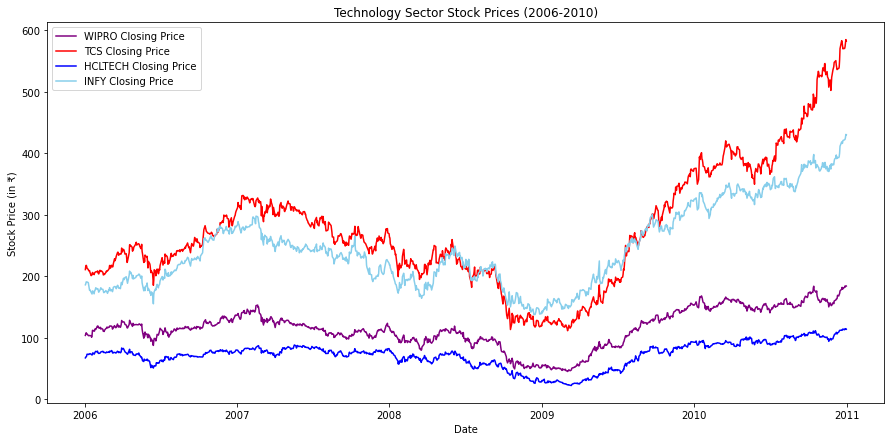

In [63]:
plt.figure(figsize=(15,7))
wipro['Close'].plot(label='WIPRO Closing Price', color = 'purple')
tcs['Close'].plot(label='TCS Closing Price', color = 'red')
hcl['Close'].plot(label='HCLTECH Closing Price', color = 'blue')
infosys['Close'].plot(label='INFY Closing Price', color ='skyblue')
plt.title("Technology Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in ₹)")
plt.legend()

<AxesSubplot:xlabel='Date'>

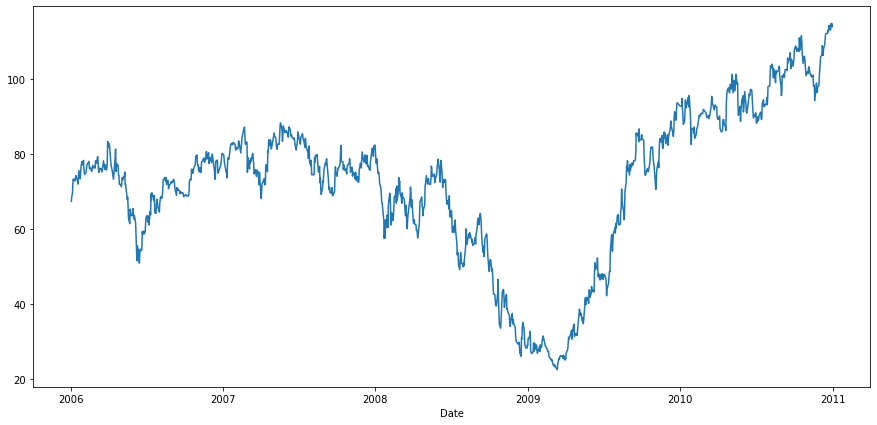

In [64]:
hcl['Close'].plot(figsize = (15, 7))

Text(0, 0.5, 'Volume Traded')

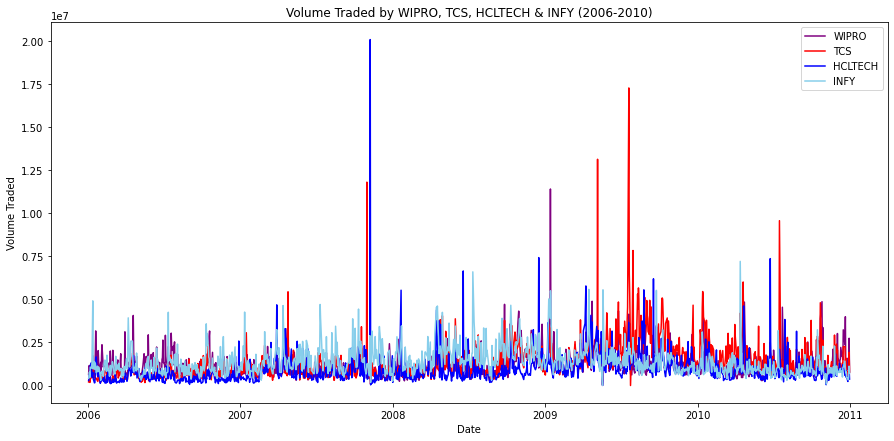

In [65]:
plt.figure(figsize=(15,7))
wipro['Volume'].plot(label='WIPRO', color = 'purple')
tcs['Volume'].plot(label='TCS', color = 'red')
hcl['Volume'].plot(label='HCLTECH', color = 'blue')
infosys['Volume'].plot(label='INFY', color ='skyblue')
plt.title("Volume Traded by WIPRO, TCS, HCLTECH & INFY (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [66]:
wipro.iloc[[wipro['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-01-13,49.95,55.07,45.23,54.07,11405290


In [67]:
tcs.iloc[[tcs['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-07-20,222.5,257.45,222.5,250.28,17269768


In [68]:
wipro['Total Traded'] = wipro['Open'] * wipro['Volume']
tcs['Total Traded'] = tcs['Open'] * tcs['Volume']
hcl['Total Traded'] = hcl['Open'] * hcl['Volume']
infosys['Total Traded'] = infosys['Open'] * infosys['Volume']

Text(0.5, 1.0, 'Market Capitalisation of WIPRO, TCS, HCL & INFY (2006-2010)')

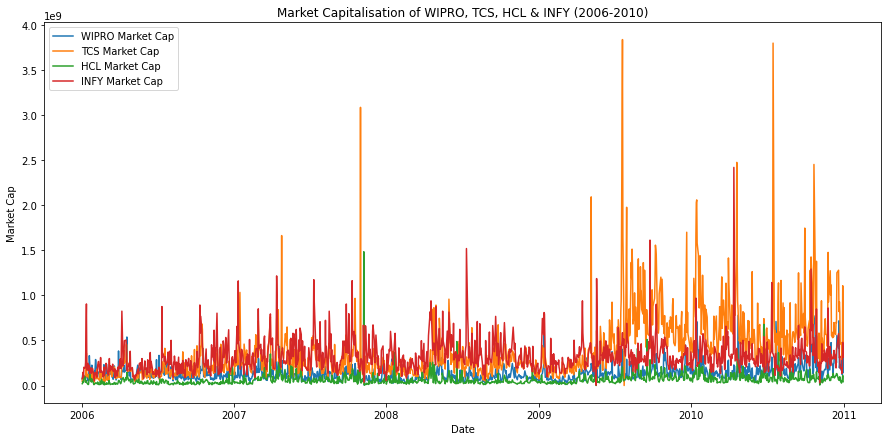

In [69]:
plt.figure(figsize = (15,7))
wipro['Total Traded'].plot(label = 'WIPRO Market Cap')
tcs['Total Traded'].plot(label = 'TCS Market Cap')
hcl['Total Traded'].plot(label = 'HCL Market Cap')
infosys['Total Traded'].plot(label = 'INFY Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of WIPRO, TCS, HCL & INFY (2006-2010)')

In [70]:
tcs.iloc[[tcs['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2009-07-20,222.5,257.45,222.5,250.28,17269768,3.842523e+09


In [71]:
from pandas.plotting import scatter_matrix

In [72]:
tech = pd.concat([wipro['Open'], tcs['Open'], hcl['Open'], infosys['Open']], axis = 1)
tech.columns = ['WIPRO Open', 'TCS Open', 'HCLTECH Open', 'INFY Open']

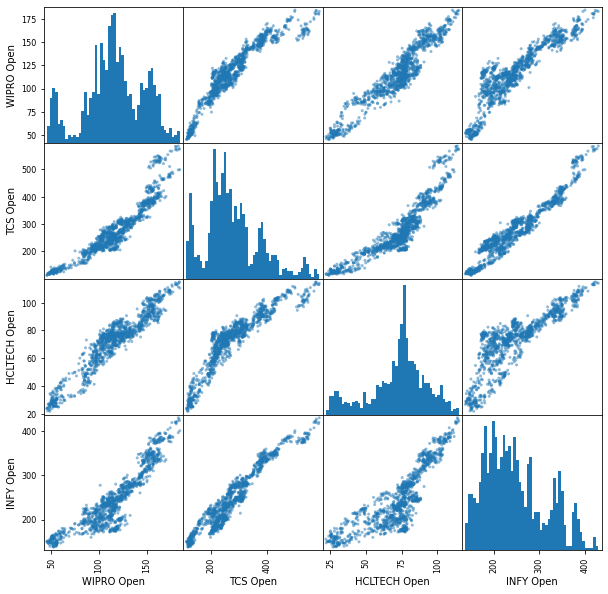

In [73]:
scatter_matrix(tech, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, DayLocator, MONDAY

wipro_reset = wipro.iloc['2006-01':'2006-01'].reset_index()

In [74]:
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) - 1
hcl['returns'] = (hcl['Close']/hcl['Close'].shift(1)) - 1
infosys['returns'] = (infosys['Close']/infosys['Close'].shift(1)) - 1

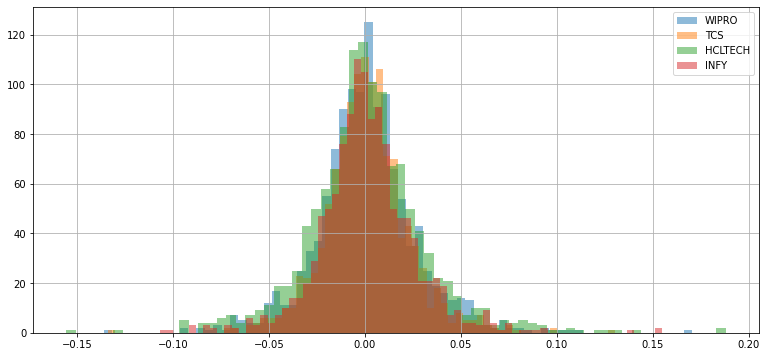

In [75]:
wipro['returns'].hist(bins = 70, label = 'WIPRO', alpha = 0.5, figsize = (13, 6))
infosys['returns'].hist(bins = 70, label = 'TCS', alpha = 0.5)
hcl['returns'].hist(bins = 70, label = 'HCLTECH', alpha = 0.5)
tcs['returns'].hist(bins = 70, label = 'INFY', alpha = 0.5)
plt.legend()

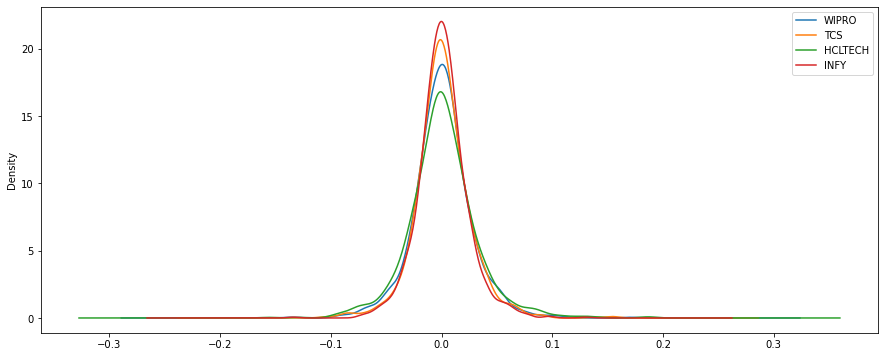

In [76]:
wipro['returns'].plot(kind='kde', label = 'WIPRO', figsize = (15, 6))
tcs['returns'].plot(kind='kde', label = 'TCS')
hcl['returns'].plot(kind='kde', label = 'HCLTECH')
infosys['returns'].plot(kind='kde', label = 'INFY')
plt.legend()

<AxesSubplot:>

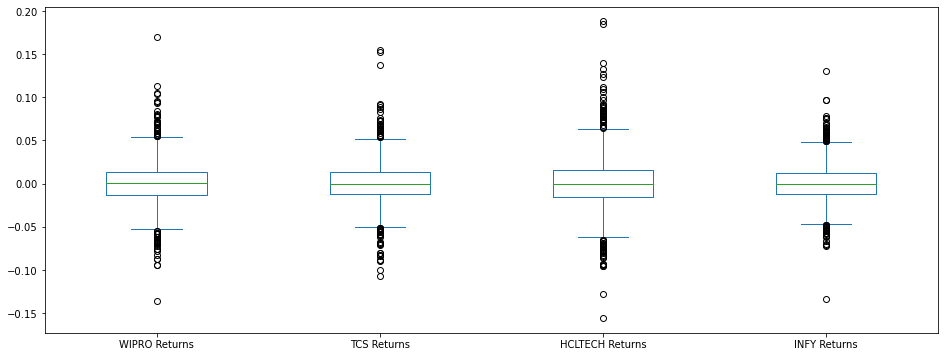

In [77]:
box_df =  pd.concat([wipro['returns'], tcs['returns'], hcl['returns'], infosys['returns']], axis = 1)
box_df.columns = ['WIPRO Returns', 'TCS Returns', 'HCLTECH Returns', 'INFY Returns']
box_df.plot(kind = 'box', figsize = (16,6))

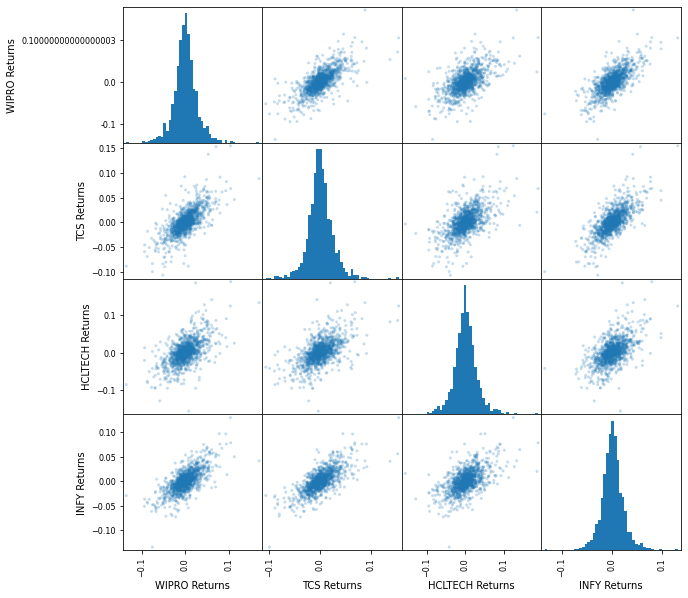

In [78]:
scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [79]:
wipro['cumulative_returns'] = (1 + wipro['returns']).cumprod()
tcs['cumulative_returns'] = (1 + tcs['returns']).cumprod()
hcl['cumulative_returns'] = (1 + hcl['returns']).cumprod()
infosys['cumulative_returns'] = (1 + infosys['returns']).cumprod()

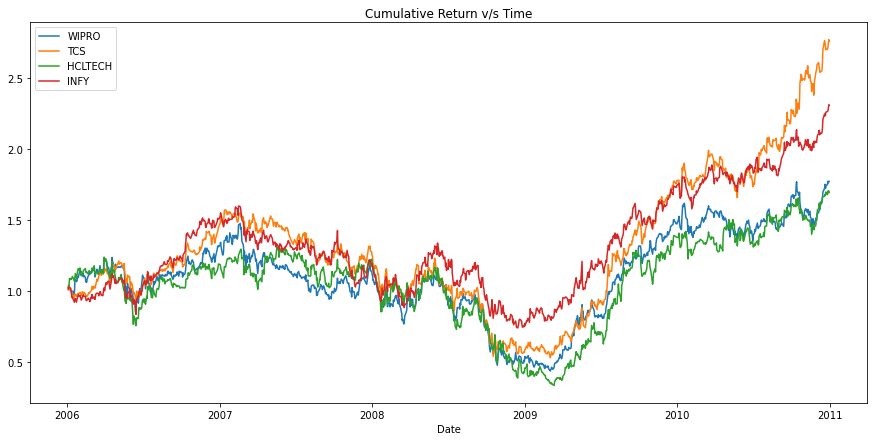

In [80]:
wipro['cumulative_returns'].plot(label='WIPRO', figsize = (15, 7))
tcs['cumulative_returns'].plot(label='TCS')
hcl['cumulative_returns'].plot(label='HCLTECH')
infosys['cumulative_returns'].plot(label='INFY')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()

### American Companies

In [81]:
apple = pd.read_csv("Apple-2006-2010 - Sheet1.csv")
amazon = pd.read_csv("Amazon-2006-2010 - Sheet1.csv")
google = pd.read_csv("Google-2006-2010 - Sheet1.csv")
microsoft = pd.read_csv("Microsoft-2006-2010 - Sheet1.csv")

In [82]:
apple['Date'] = pd.to_datetime(apple['Date'], infer_datetime_format=True)
apple['Date'] = pd.to_datetime(apple['Date']).dt.date
amazon['Date'] = pd.to_datetime(amazon['Date'], infer_datetime_format=True)
amazon['Date'] = pd.to_datetime(amazon['Date']).dt.date
google['Date'] = pd.to_datetime(google['Date'], infer_datetime_format=True)
google['Date'] = pd.to_datetime(google['Date']).dt.date
microsoft['Date'] = pd.to_datetime(microsoft['Date'], infer_datetime_format=True)
microsoft['Date'] = pd.to_datetime(microsoft['Date']).dt.date

In [83]:
apple = apple.set_index('Date')
amazon = amazon.set_index('Date')
google = google.set_index('Date')
microsoft = microsoft.set_index('Date')


In [84]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,2.59,2.67,2.58,2.67,28836148
2006-01-04,2.68,2.71,2.66,2.68,22175088
2006-01-05,2.67,2.68,2.63,2.66,16056583
2006-01-06,2.69,2.74,2.66,2.73,25162762
2006-01-09,2.75,2.76,2.71,2.72,24123032


In [85]:
amazon.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,2.37,2.39,2.31,2.38,7582127
2006-01-04,2.37,2.39,2.33,2.36,7440914
2006-01-05,2.36,2.41,2.36,2.38,5417258
2006-01-06,2.40,2.43,2.37,2.39,6154285
2006-01-09,2.33,2.36,2.32,2.35,8945056


In [86]:
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,10.55,10.89,10.46,10.88,13137450
2006-01-04,11.10,11.22,10.99,11.13,15292353
2006-01-05,11.13,11.29,11.04,11.28,10815661
2006-01-06,11.42,11.76,11.33,11.64,17698788
2006-01-09,11.66,11.84,11.52,11.67,12795837


In [87]:
microsoft.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974416
2006-01-04,26.77,27.08,26.77,26.97,57975660
2006-01-05,26.96,27.13,26.91,26.99,48247608
2006-01-06,26.89,27.00,26.49,26.91,100969088
2006-01-09,26.94,27.07,26.76,26.86,55627836


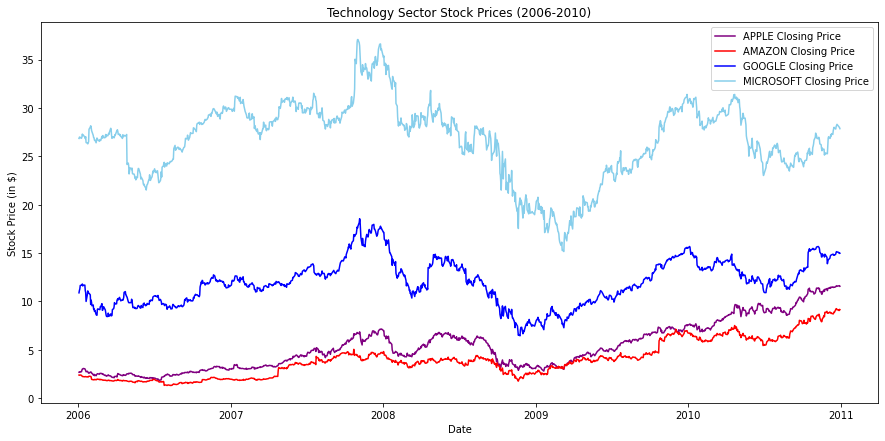

In [88]:
plt.figure(figsize=(15,7))
apple['Close'].plot(label='APPLE Closing Price', color = 'purple')
amazon['Close'].plot(label='AMAZON Closing Price', color = 'red')
google['Close'].plot(label='GOOGLE Closing Price', color = 'blue')
microsoft['Close'].plot(label='MICROSOFT Closing Price', color ='skyblue')
plt.title("Technology Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in $)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

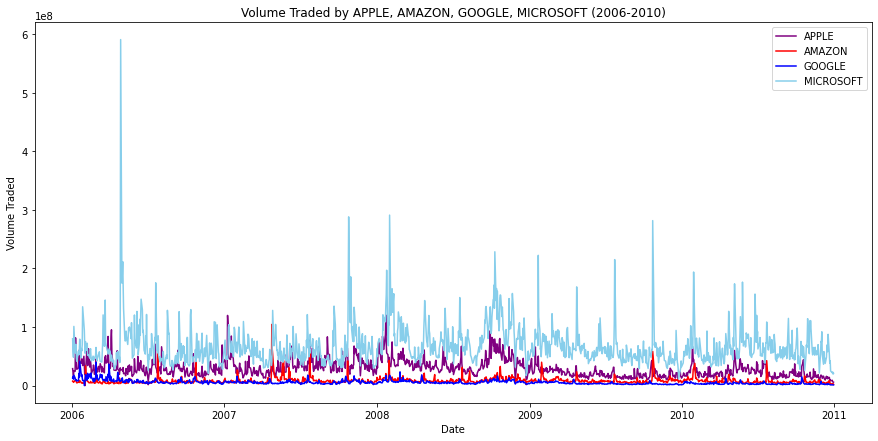

In [89]:
plt.figure(figsize=(15,7))
apple['Volume'].plot(label='APPLE', color = 'purple')
amazon['Volume'].plot(label='AMAZON', color = 'red')
google['Volume'].plot(label='GOOGLE', color = 'blue')
microsoft['Volume'].plot(label='MICROSOFT', color ='skyblue')
plt.title("Volume Traded by APPLE, AMAZON, GOOGLE, MICROSOFT (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [90]:
microsoft.iloc[[microsoft['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2006-04-28,24.23,24.5,24.0,24.15,591078592


In [91]:
apple.iloc[[apple['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-23,4.86,5.0,4.51,4.97,120466288


In [92]:
apple['Total Traded'] = apple['Open'] * apple['Volume']
amazon['Total Traded'] = amazon['Open'] * amazon['Volume']
google['Total Traded'] = google['Open'] * google['Volume']
microsoft['Total Traded'] = microsoft['Open'] * microsoft['Volume']

Text(0.5, 1.0, 'Market Capitalisation of APPLE, AMAZON, GOOGLE, MICROSOFT(2006-2010)')

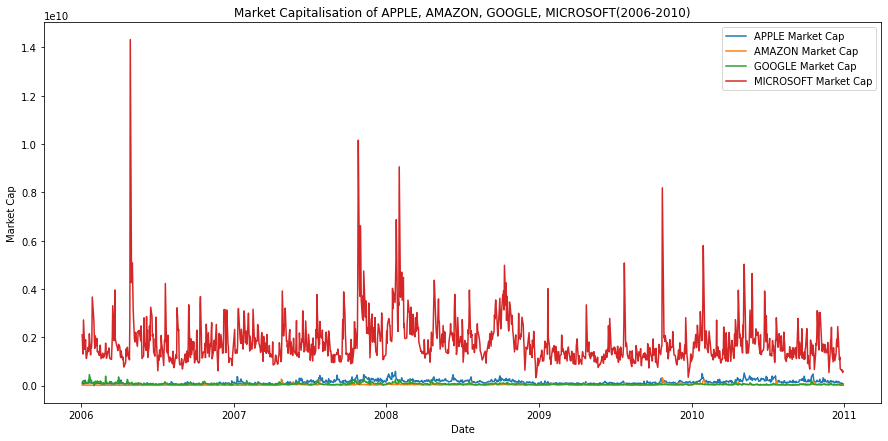

In [93]:
plt.figure(figsize = (15,7))
apple['Total Traded'].plot(label = 'APPLE Market Cap')
amazon['Total Traded'].plot(label = 'AMAZON Market Cap')
google['Total Traded'].plot(label = 'GOOGLE Market Cap')
microsoft['Total Traded'].plot(label = 'MICROSOFT Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of APPLE, AMAZON, GOOGLE, MICROSOFT(2006-2010)')

In [94]:
microsoft.iloc[[microsoft['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2006-04-28,24.23,24.5,24.0,24.15,591078592,1.432183e+10


In [95]:
from pandas.plotting import scatter_matrix

In [96]:
techA = pd.concat([apple['Open'], amazon['Open'],google['Open'], microsoft['Open']], axis = 1)
techA.columns = ['APPLE Open', 'AMAZON Open', 'GOOGLE Open', 'MICROSOFT Open']

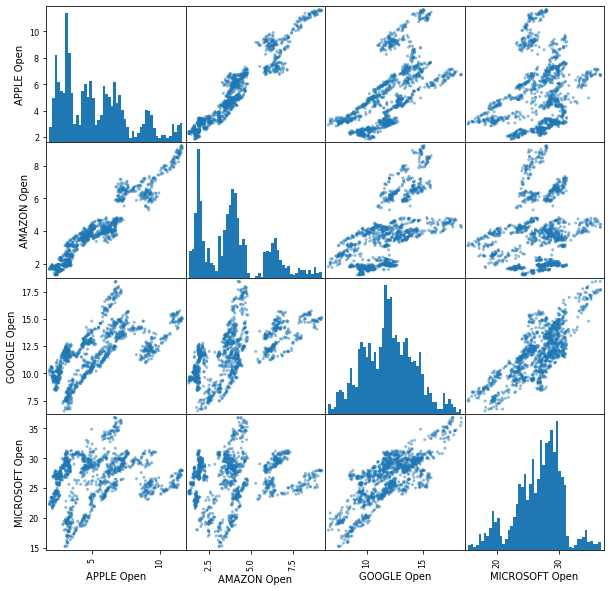

In [97]:
scatter_matrix(techA, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [98]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
apple['returns'] = (apple['Close']/apple['Close'].shift(1)) - 1
amazon['returns'] = (amazon['Close']/amazon['Close'].shift(1)) - 1
google['returns'] = (google['Close']/google['Close'].shift(1)) - 1
microsoft['returns'] = (microsoft['Close']/microsoft['Close'].shift(1)) - 1

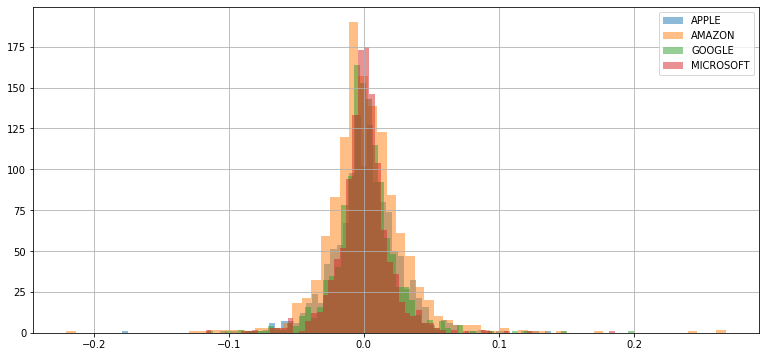

In [100]:
apple['returns'].hist(bins = 70, label = 'APPLE', alpha = 0.5, figsize = (13, 6))
amazon['returns'].hist(bins = 70, label = 'AMAZON', alpha = 0.5)
google['returns'].hist(bins = 70, label = 'GOOGLE', alpha = 0.5)
microsoft['returns'].hist(bins = 70, label = 'MICROSOFT', alpha = 0.5)
plt.legend()


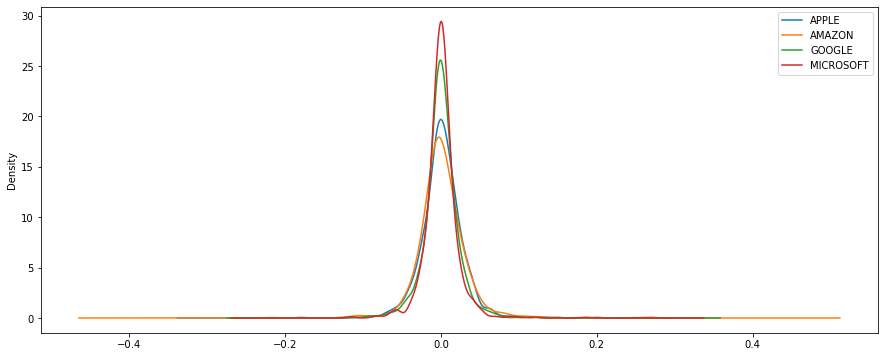

In [101]:
apple['returns'].plot(kind='kde', label = 'APPLE', figsize = (15, 6))
amazon['returns'].plot(kind='kde', label = 'AMAZON')
google['returns'].plot(kind='kde', label = 'GOOGLE')
microsoft['returns'].plot(kind='kde', label = 'MICROSOFT')
plt.legend()

<AxesSubplot:>

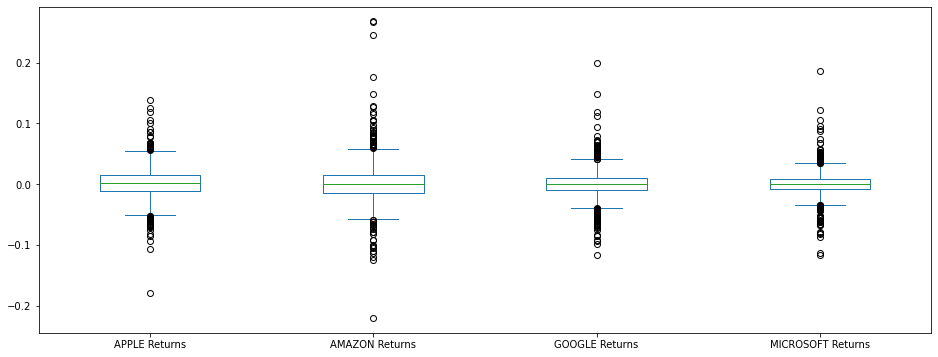

In [102]:
boxA_df = pd.concat([apple['returns'], amazon['returns'], google['returns'], microsoft['returns']], axis=1)
boxA_df.columns = ['APPLE Returns', 'AMAZON Returns', 'GOOGLE Returns', 'MICROSOFT Returns']
boxA_df.plot(kind = 'box', figsize = (16,6))


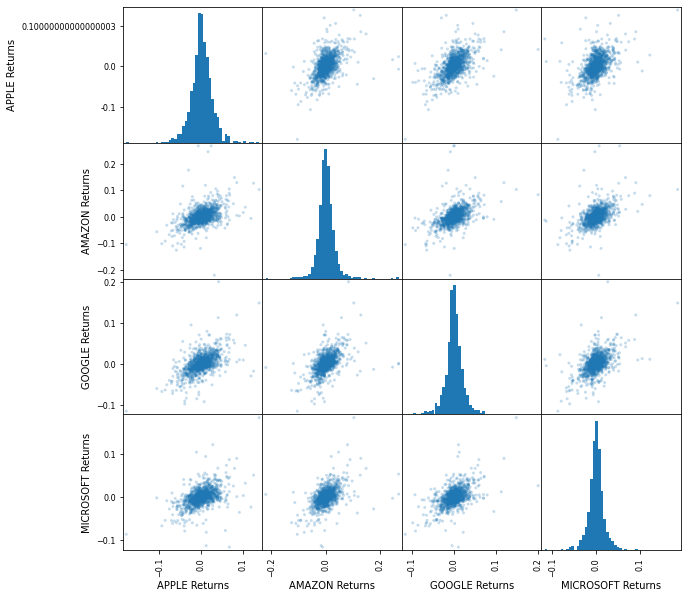

In [103]:
scatter_matrix(boxA_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [104]:
apple['cumulative_returns'] = (1 + apple['returns']).cumprod()
amazon['cumulative_returns'] = (1 + amazon['returns']).cumprod()
google['cumulative_returns'] = (1 + google['returns']).cumprod()
microsoft['cumulative_returns'] = (1 + microsoft['returns']).cumprod()


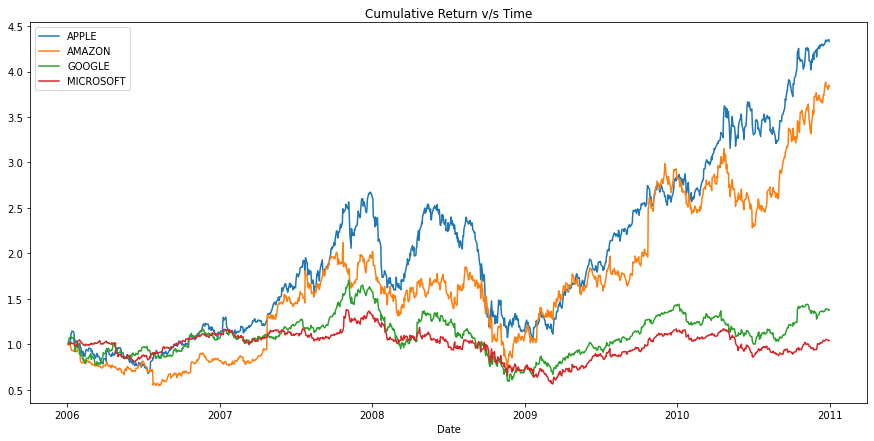

In [105]:
apple['cumulative_returns'].plot(label='APPLE', figsize = (15, 7))
amazon['cumulative_returns'].plot(label='AMAZON')
google['cumulative_returns'].plot(label='GOOGLE')
microsoft['cumulative_returns'].plot(label='MICROSOFT')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()